## Logistic_Regressiion

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
df1= pd.read_csv('Admission.csv')

In [20]:
df1.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [21]:
target=df1[['ADMIT']]
features=df1.drop('ADMIT',axis=1)

In [22]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 3)
(100, 3)
(300, 1)
(100, 1)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model= LogisticRegression()

In [26]:
log_model.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
y_pred= log_model.predict(x_test)

In [28]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
df1.ADMIT.value_counts()

ADMIT
0    273
1    127
Name: count, dtype: int64

In [42]:
## changing the thershold value as  greater than 0.4
y_pred_new=[1 if x[1]>0.4 else 0 for x in log_model.predict_proba(x_test)]

In [43]:
y_pred_new1=[0 if x[0]>0.6 else 1 for x in log_model.predict_proba(x_test)]

In [30]:
log_model.predict_proba(x_test)

array([[0.68252193, 0.31747807],
       [0.87744779, 0.12255221],
       [0.48256058, 0.51743942],
       [0.86679746, 0.13320254],
       [0.93027558, 0.06972442],
       [0.69139854, 0.30860146],
       [0.61164889, 0.38835111],
       [0.82789895, 0.17210105],
       [0.78305594, 0.21694406],
       [0.73953192, 0.26046808],
       [0.88266987, 0.11733013],
       [0.58036674, 0.41963326],
       [0.84853288, 0.15146712],
       [0.73136097, 0.26863903],
       [0.62976917, 0.37023083],
       [0.86314428, 0.13685572],
       [0.58562528, 0.41437472],
       [0.88252094, 0.11747906],
       [0.82980417, 0.17019583],
       [0.83263704, 0.16736296],
       [0.87632849, 0.12367151],
       [0.70645687, 0.29354313],
       [0.60348332, 0.39651668],
       [0.52062454, 0.47937546],
       [0.53629978, 0.46370022],
       [0.77364866, 0.22635134],
       [0.74850836, 0.25149164],
       [0.71602515, 0.28397485],
       [0.81709857, 0.18290143],
       [0.84547159, 0.15452841],
       [0.

In [31]:
log_model.coef_

array([[ 0.00328986,  0.74809476, -0.59748804]])

In [32]:
log_model.intercept_

array([-3.9330948])

In [33]:
accuracy_score(y_test,y_pred)

0.63

In [44]:
accuracy_score(y_test,y_pred_new1)

0.64

In [34]:
import seaborn as sns

<Axes: xlabel='GPA'>

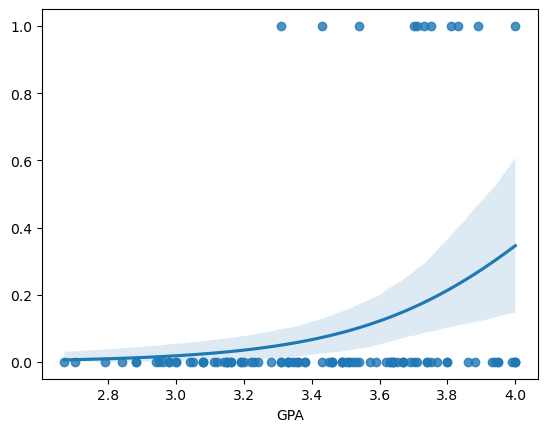

In [35]:
sns.regplot(data=df1, x=x_test.iloc[:,1],y=y_pred,logistic=True)

### Metrics of Performance

In [37]:
df1.ADMIT.value_counts()

ADMIT
0    273
1    127
Name: count, dtype: int64

In [38]:
273/400

0.6825

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [47]:
confusion_matrix(y_test,y_pred)

array([[58,  6],
       [31,  5]], dtype=int64)

In [48]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

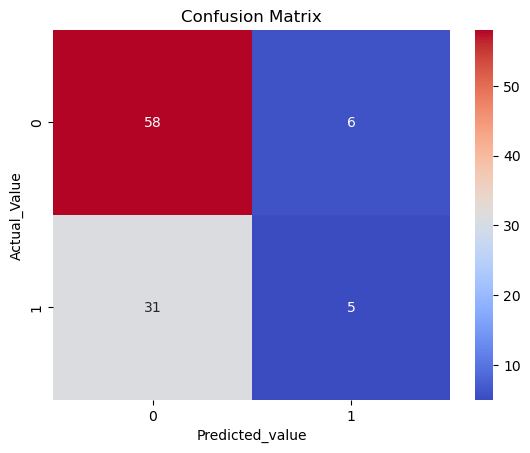

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')
plt.xlabel('Predicted_value')
plt.ylabel('Actual_Value')
plt.title('Confusion Matrix')

In [50]:
y_test.value_counts()

ADMIT
0        64
1        36
Name: count, dtype: int64

In [52]:
precision_0= 58/(58+31)
precision_0

0.651685393258427

In [53]:
precision_1= 5/(5+6)
precision_1

0.45454545454545453

In [54]:
recall_0= 58/(58+6)
recall_0

0.90625

In [55]:
recall_1= 5/(5+31)
recall_1

0.1388888888888889

In [57]:
f1_score_0= 2*(precision_0*recall_0)/(precision_0+recall_0)
f1_score_0

0.758169934640523

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        64
           1       0.45      0.14      0.21        36

    accuracy                           0.63       100
   macro avg       0.55      0.52      0.49       100
weighted avg       0.58      0.63      0.56       100



In [75]:
log_proba=log_model.predict_proba(x_test)[:,1]
log_proba

array([0.31747807, 0.12255221, 0.51743942, 0.13320254, 0.06972442,
       0.30860146, 0.38835111, 0.17210105, 0.21694406, 0.26046808,
       0.11733013, 0.41963326, 0.15146712, 0.26863903, 0.37023083,
       0.13685572, 0.41437472, 0.11747906, 0.17019583, 0.16736296,
       0.12367151, 0.29354313, 0.39651668, 0.47937546, 0.46370022,
       0.22635134, 0.25149164, 0.28397485, 0.18290143, 0.15452841,
       0.33835074, 0.21855785, 0.57668419, 0.30448176, 0.46928567,
       0.18879233, 0.18123639, 0.32500418, 0.07920408, 0.70459162,
       0.12030266, 0.25814895, 0.40987618, 0.60202496, 0.31184054,
       0.4617968 , 0.17008112, 0.25372048, 0.32332685, 0.63463948,
       0.47469961, 0.21452046, 0.42698083, 0.30815898, 0.32285258,
       0.2266503 , 0.40680499, 0.43999654, 0.20839015, 0.42971859,
       0.36253272, 0.42147913, 0.33040563, 0.11533786, 0.41437472,
       0.21127292, 0.35568626, 0.38228806, 0.23242167, 0.18913716,
       0.25627194, 0.1197317 , 0.30469097, 0.5938998 , 0.40528

In [76]:
auc_score=roc_auc_score(y_test,log_proba)
auc_score

0.6139322916666666

In [88]:
fpr,tpr,thr=roc_curve(y_test,log_proba)
fpr

array([0.      , 0.015625, 0.015625, 0.03125 , 0.03125 , 0.078125,
       0.078125, 0.09375 , 0.09375 , 0.125   , 0.125   , 0.140625,
       0.140625, 0.15625 , 0.15625 , 0.171875, 0.1875  , 0.21875 ,
       0.21875 , 0.265625, 0.265625, 0.28125 , 0.28125 , 0.328125,
       0.328125, 0.359375, 0.359375, 0.375   , 0.375   , 0.421875,
       0.421875, 0.4375  , 0.4375  , 0.453125, 0.453125, 0.46875 ,
       0.46875 , 0.5625  , 0.5625  , 0.578125, 0.578125, 0.59375 ,
       0.59375 , 0.671875, 0.671875, 0.734375, 0.734375, 0.859375,
       0.859375, 0.890625, 0.890625, 0.921875, 0.921875, 0.984375,
       0.984375, 1.      ])

In [89]:
tpr

array([0.        , 0.        , 0.02777778, 0.02777778, 0.05555556,
       0.05555556, 0.11111111, 0.11111111, 0.13888889, 0.13888889,
       0.16666667, 0.16666667, 0.22222222, 0.22222222, 0.33333333,
       0.33333333, 0.36111111, 0.36111111, 0.38888889, 0.38888889,
       0.41666667, 0.41666667, 0.44444444, 0.44444444, 0.5       ,
       0.5       , 0.52777778, 0.52777778, 0.58333333, 0.58333333,
       0.63888889, 0.63888889, 0.66666667, 0.66666667, 0.69444444,
       0.69444444, 0.72222222, 0.72222222, 0.75      , 0.75      ,
       0.77777778, 0.77777778, 0.80555556, 0.80555556, 0.83333333,
       0.83333333, 0.86111111, 0.86111111, 0.91666667, 0.91666667,
       0.94444444, 0.94444444, 0.97222222, 0.97222222, 1.        ,
       1.        ])

In [90]:
thr

array([       inf, 0.70924137, 0.70459162, 0.63463948, 0.62156589,
       0.57668419, 0.51743942, 0.51000799, 0.50759637, 0.47636273,
       0.47469961, 0.46928567, 0.4617968 , 0.44738246, 0.42147913,
       0.41963326, 0.41437472, 0.40680499, 0.40528558, 0.38835111,
       0.38723822, 0.38228806, 0.37023083, 0.3543239 , 0.34716111,
       0.33040563, 0.32500418, 0.32466833, 0.32285258, 0.30860146,
       0.30509355, 0.30469097, 0.30448176, 0.29354313, 0.28397485,
       0.26863903, 0.26336045, 0.25149164, 0.24549877, 0.23242167,
       0.2266503 , 0.22635134, 0.21855785, 0.20839015, 0.18913716,
       0.18112977, 0.17486645, 0.14408013, 0.13685572, 0.12367151,
       0.12255221, 0.1197317 , 0.11747906, 0.07920408, 0.06973579,
       0.06972442])

In [78]:
thr.shape

(56,)

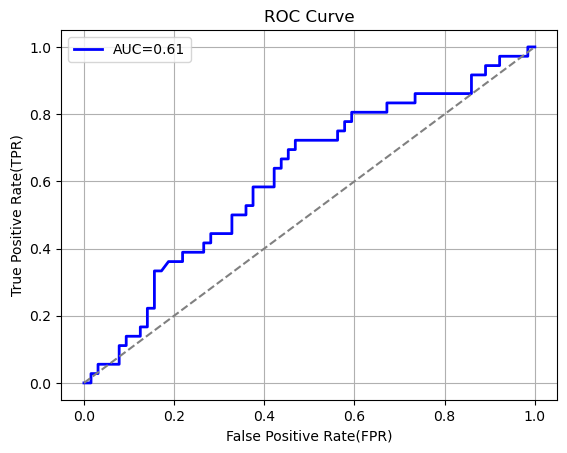

In [87]:
plt.plot(fpr,tpr,color='blue',lw=2,label=f'AUC={auc_score:.2}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

In [80]:
name='raja'
age=23

In [84]:
print(f'{name} is {age} years old')

raja is 23 years old


In [91]:
LogisticRegression(multi_class='ovr')

LogisticRegression(multi_class='ovr')